# Importing libraries

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator


from keras import regularizers
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as p
import pandas as pd
from tensorflow.keras.utils import to_categorical,normalize
from sklearn.model_selection import train_test_split

# preprocessing the images

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = False,
                                  brightness_range = [0.7, 1.3],)

In [3]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [5]:
x_train = train_datagen.flow_from_directory(r"C:\Users\DELL\Desktop\IA_project\dataset\train",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode ="categorical",
                                           color_mode = 'rgb')

Found 2205 images belonging to 5 classes.


In [6]:
x_test = test_datagen.flow_from_directory(r"C:\Users\divya.DESKTOP-LQR5QHM\Desktop\1st sem\IA\dataset\test",
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode="categorical")

Found 550 images belonging to 5 classes.


# Building the CNN model

In [7]:
model = Sequential()

In [10]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [11]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [12]:
 model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [13]:
model.add(Conv2D(128,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) 

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=300,activation="relu"))

In [16]:
model.add(Dense(units=150,activation="relu"))

In [17]:
model.add(Dense(units=5,activation="softmax"))

In [18]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0

In [17]:
x_train.class_indices

{'Acne': 0, 'Melanoma': 1, 'Psoriasis': 2, 'Rosacea': 3, 'Vitiligo': 4}

In [18]:
batch_size = 32

In [19]:
model.fit_generator(x_train,steps_per_epoch=69,epochs=60,validation_data=x_test,validation_steps=18)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
69/69 [==============================] - 19s 268ms/step - loss: 1.5657 - accuracy: 0.2866 - val_loss: 1.5035 - val_accuracy: 0.3509
Epoch 2/60
69/69 [==============================] - 19s 280ms/step - loss: 1.4805 - accuracy: 0.3460 - val_loss: 1.3363 - val_accuracy: 0.4582
Epoch 3/60
69/69 [==============================] - 17s 248ms/step - loss: 1.4115 - accuracy: 0.4036 - val_loss: 1.3390 - val_accuracy: 0.4782
Epoch 4/60
69/69 [==============================] - 18s 255ms/step - loss: 1.3765 - accuracy: 0.4100 - val_loss: 1.2872 - val_accuracy: 0.4527
Epoch 5/60
69/69 [==============================] - 18s 257ms/step - loss: 1.3357 - accuracy: 0.4376 - val_loss: 1.2688 - val_accuracy: 0.4782
Epoch 6/60
69/69 [==============================] - 19s 270ms/step - loss: 1.2836 - accuracy: 0.4653 - val_loss: 1.2083 - val_accuracy: 0.5182
Epoch 7/60
69/69 [==============================] - 19s 282ms/step

Epoch 56/60
69/69 [==============================] - 24s 348ms/step - loss: 0.1035 - accuracy: 0.9673 - val_loss: 2.6012 - val_accuracy: 0.6000
Epoch 57/60
69/69 [==============================] - 22s 315ms/step - loss: 0.0808 - accuracy: 0.9764 - val_loss: 2.5923 - val_accuracy: 0.6400
Epoch 58/60
69/69 [==============================] - 21s 300ms/step - loss: 0.1069 - accuracy: 0.9673 - val_loss: 2.2916 - val_accuracy: 0.6200
Epoch 59/60
69/69 [==============================] - 21s 303ms/step - loss: 0.1295 - accuracy: 0.9601 - val_loss: 2.3699 - val_accuracy: 0.6055
Epoch 60/60
69/69 [==============================] - 19s 275ms/step - loss: 0.0906 - accuracy: 0.9692 - val_loss: 2.4302 - val_accuracy: 0.6091


In [20]:
model.save("skindisease.h5")

In [21]:
loss, accuracy = model.evaluate(x_test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

18/18 [==============================] - 1s 69ms/step - loss: 2.4302 - accuracy: 0.6091
Accuracy: 0.6090909242630005
Loss: 2.430194139480591


In [22]:
metadata=pd.read_csv(r"C:\Users\divya.DESKTOP-LQR5QHM\Desktop\1st sem\IA\ham\HAM10000_metadata.csv")
metadata


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [23]:
#Checking for NA
metadata.isna().isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [24]:
df=pd.read_csv(r"C:\Users\divya.DESKTOP-LQR5QHM\Desktop\1st sem\IA\ham\hmnist_28_28_RGB.csv")
x=df.drop('label',axis=1)
y=df['label']
x=x.to_numpy()
x=x/255
y=to_categorical(y)

In [25]:
label={4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

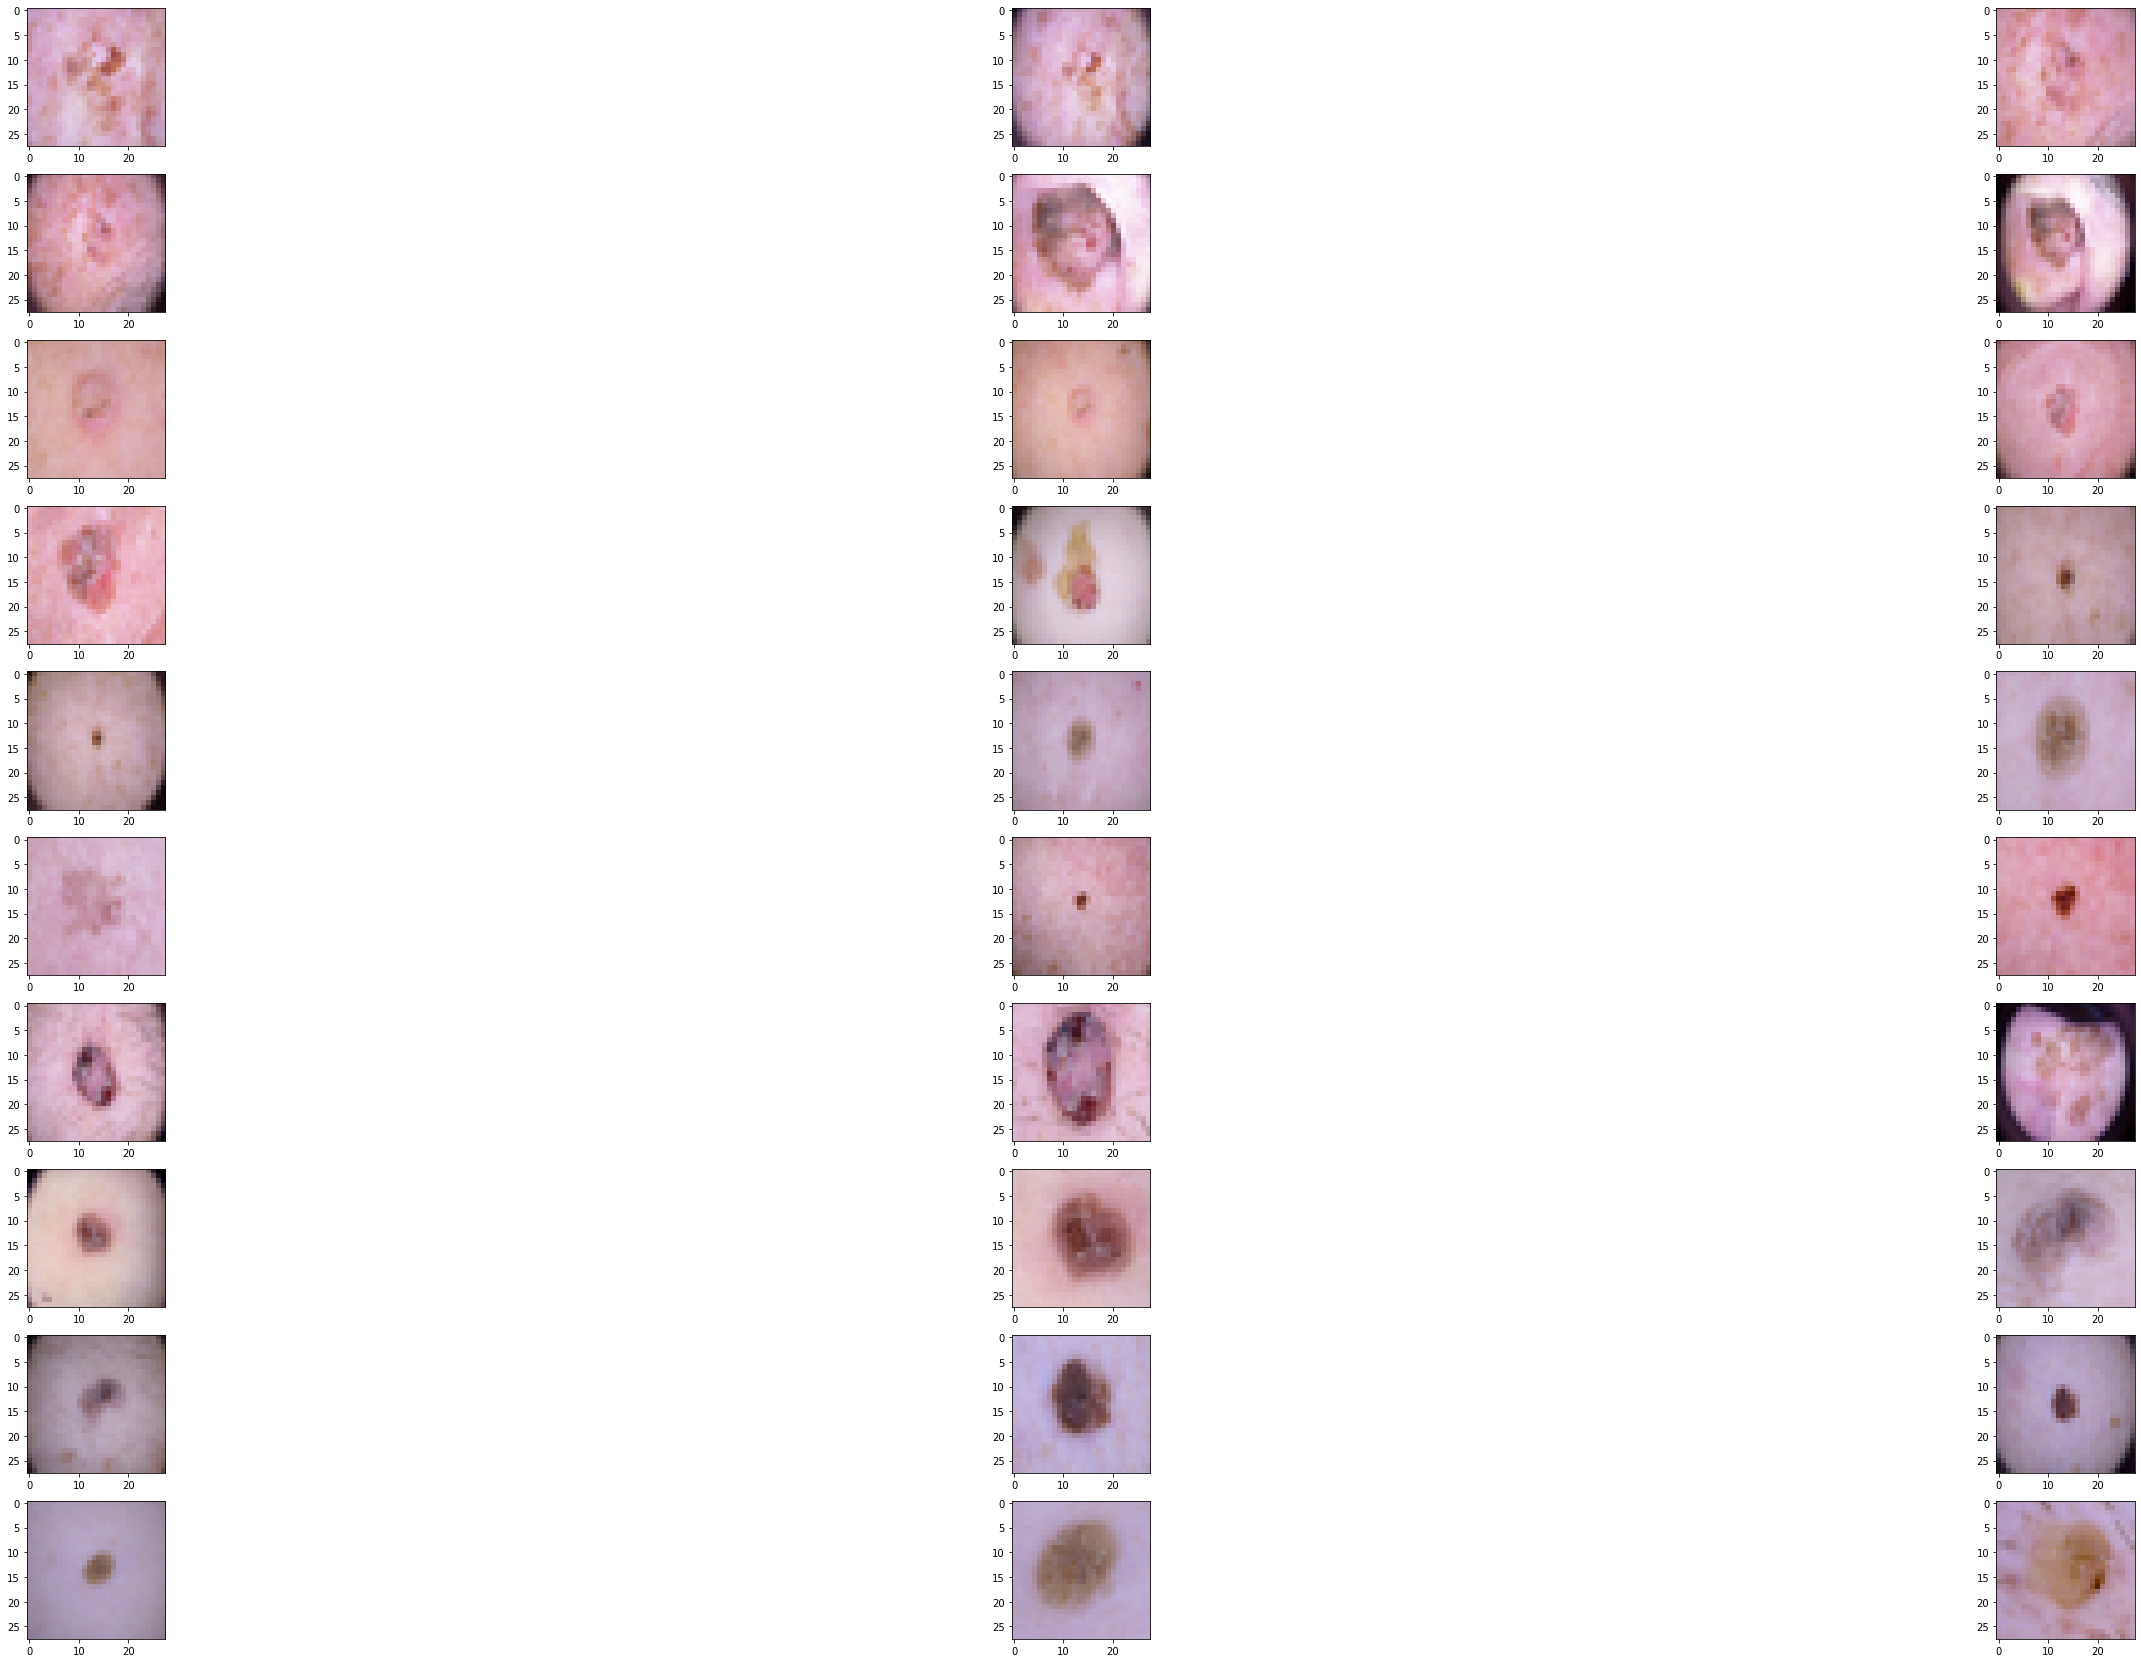

In [26]:
x=x.reshape(-1,28,28,3)
p.figure(figsize=(50,30))
for i in range(30):
    p.subplot(10,3,i+1)
    img=x[i]
    p.imshow(img)

In [27]:
trainx,trainy,testx,testy = train_test_split(x,y,test_size=0.02,random_state=42)

In [28]:
data_generator=ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True,
                               vertical_flip=True)

In [29]:
data_generator.fit(trainx)

In [30]:
input_shape=(28,28,3)

model=Sequential()

model.add(Conv2D(64,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPool(pool_size=(2, 2)))

model.add(Conv2D(512,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPool(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(1024,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPool(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(1024,(1,1),input_shape=(28,28,3),activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256,activation='relu')
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',Recall()])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 64)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 512)       131584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)       

In [32]:
early=EarlyStopping(monitor='accuracy',patience=4,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0)

In [33]:
model.fit(trainx,testx,steps_per_epoch=69,epochs=60,batch_size=90,validation_data=(trainy, testy),callbacks=[early,reduce_lr])

Epoch 1/60
69/69 [==============================] - 67s 967ms/step - loss: 4.8295 - accuracy: 0.6367 - recall: 0.5153 - val_loss: 4.0493 - val_accuracy: 0.6119 - val_recall: 0.0000e+00
Epoch 2/60
69/69 [==============================] - 66s 953ms/step - loss: 2.5415 - accuracy: 0.6736 - recall: 0.5377 - val_loss: 2.9870 - val_accuracy: 0.0398 - val_recall: 0.0000e+00
Epoch 3/60
69/69 [==============================] - 69s 1s/step - loss: 1.6387 - accuracy: 0.6931 - recall: 0.5754 - val_loss: 2.8248 - val_accuracy: 0.1294 - val_recall: 0.1244
Epoch 4/60
69/69 [==============================] - 67s 974ms/step - loss: 1.3159 - accuracy: 0.6935 - recall: 0.5833 - val_loss: 2.9837 - val_accuracy: 0.1294 - val_recall: 0.1294
Epoch 5/60
69/69 [==============================] - 65s 937ms/step - loss: 1.1192 - accuracy: 0.7124 - recall: 0.6086 - val_loss: 2.5633 - val_accuracy: 0.1294 - val_recall: 0.0597
Epoch 6/60
69/69 [==============================] - 68s 986ms/step - loss: 1.0048 - accura

In [34]:
model.save("best_model.h5")



<AxesSubplot:>

<Figure size 1080x360 with 0 Axes>

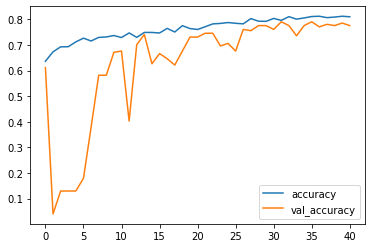

In [35]:
p.figure(figsize=(15,5))
loss=pd.DataFrame(model.history.history)
loss=loss[['accuracy','val_accuracy']]
loss.plot()